[1, 2]
[3, 4]
[5, 6]


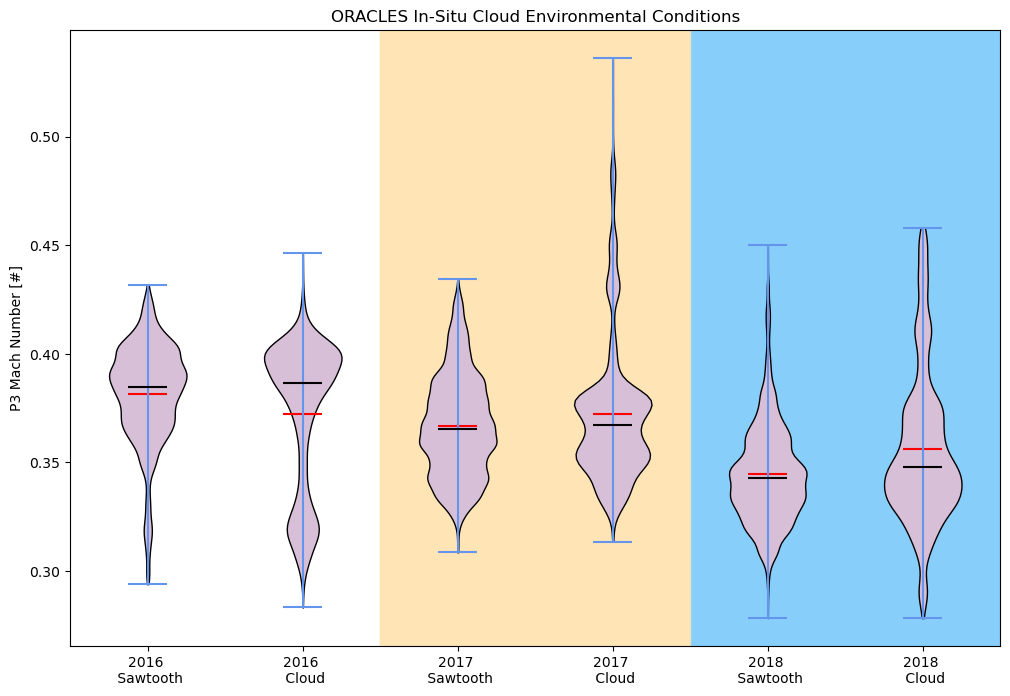

In [1]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def oracles_read(nfiles, nvar='Mach_Number'):

    def select_vars(obj, nvar=nvar):
        dedup = obj
        # create a list of all variables in the dataset
        newlist = [x for x in dedup.keys() if x != 'P3_module_flags']
        # drop everything but input variables
        droplist = [y for y in newlist if y != nvar]
        # remove all other variables
        dedup = dedup.drop_vars(droplist)
        # Clean up dimensions
        ndims = [x for x in dedup.dims if x != 'time']
        # remove all extra dimensions
        dedup = dedup.drop_dims(ndims)
        return dedup
    
    # Read in all the ORACLEs 2018 data with ACT
    ds = xr.open_mfdataset(nfiles,
                           coords='minimal',
                           preprocess=select_vars
                          )
    
    return ds
    

def violin_plot(obj,
                axarr,
                year='2018',
                nvar='Mach_Number',
                ):
    """
    Violin plot to subset Sawtooth and Level Cloud leg profiles
    for a given variable and campaign. 

    Inputs
    ------

    obj : xarray mf_dataset
        must contain nvar as a DataArray, along with P3 Modules
    axarr : matplotlib axe 
        matplotlib suplot axe to plot into
    year : string
        string containing year of project
    pos : list
        list containing intergers for location to plot violins
    nvar : string
        variable to display

    Returns
    ------
    figure of violin plots
    """

    if nvar == 'True_Air_Speed':
        ylabel = 'True Air Speed [knots]'
    elif nvar == 'Static_Air_Temp':
        ylabel = 'Static Air Temperature [degree Celcius]'
    elif nvar == 'Static_Pressure':
        ylabel = 'Static Pressure [hPa]'
    else:
        ylabel = 'P3 Mach Number [#]'

    # Define the Sawtooth periods
    saw = np.where(obj['P3_module_flags'].data.compute() == 5)
    cl = np.where(obj['P3_module_flags'].data.compute() == 1)
    # Subset the Variable
    nvar_saw = [x for x in obj[nvar][saw].data[:].compute() if np.isnan(x) == False ]
    nvar_cl = [x for x in obj[nvar][cl].data[:].compute() if np.isnan(x) == False ]     
    # Define all the tick labels for the plots
    tick_label = ['',
                  '2016 \n Sawtooth', 
                  '2016 \n Cloud', 
                  '2017 \n Sawtooth', 
                  '2017 \n Cloud', 
                  '2018 \n Sawtooth', 
                  '2018 \n Cloud',
                  ]

    if year == '2016':
        npos = [1, 2]
    elif year == '2017':
        npos = [3, 4]
    elif year == '2018':
        npos = [5, 6]
    else:
        npos = [0, 7]
    print(npos)
    sc = axarr.violinplot(np.array(nvar_saw),
                       positions=[npos[0]],
                       vert=True,
                       showmeans=True,
                       showmedians=True,
                       showextrema=True
                      )

    sc2 = axarr.violinplot(np.array(nvar_cl),
                        positions=[npos[1]],
                        vert=True,
                        showmeans=True,
                        showmedians=True,
                        showextrema=True
                       )

    # Label the means/medians
    for partname in ('cbars','cmins','cmaxes'):
        sc[partname].set_edgecolor('cornflowerblue')
        sc2[partname].set_edgecolor('cornflowerblue')
    sc['cmeans'].set_edgecolor('red')
    sc['cmedians'].set_edgecolor('black')
    sc2['cmeans'].set_edgecolor('red')
    sc2['cmedians'].set_edgecolor('black')
    # Change the color of the body
    for pc in sc['bodies']:
       pc.set_facecolor('thistle')
       pc.set_edgecolor('black')
       pc.set_alpha(1)
    for vc in sc2['bodies']:
       vc.set_facecolor('thistle')
       vc.set_edgecolor('black')
       vc.set_alpha(1)

    # Set the title
    axarr.set_ylabel(ylabel)
    # Set the background color
    axarr.axvspan(4.5, 7, color='lightskyblue', zorder=-1, alpha=0.75)
    axarr.axvspan(2.5, 4.5, color='moccasin', zorder=-1, alpha=0.75)
    # set ticks
    axarr.set_xticks([0, 1, 2, 3, 4, 5, 6])
    axarr.set_xticklabels(tick_label)
    axarr.set_xlim([0.5, 6.5])
    axarr.set_title('ORACLES In-Situ Cloud Environmental Conditions')

    return axarr

def main():
    # locate all the ORACLES 2018 data
    file_list_2018 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2018*'))
    file_list_2017 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2017*'))
    file_list_2016 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2016*'))
    # read in all the ORACLES data
    ds2018 = oracles_read(file_list_2018)
    ds2017 = oracles_read(file_list_2017)
    ds2016 = oracles_read(file_list_2016)

    # create the plot
    # Plot the Mach Number violin plot for 2018
    fig, axarr = plt.subplots(1, 1, figsize=[12, 8])

    violin_plot(ds2016,
                axarr,
                year='2016')

    violin_plot(ds2017,
                axarr,
                year='2017')

    violin_plot(ds2018,
                axarr,
                year='2018')
    
    #plt.suptitle('ORACLES In-Situ Cloud Sampling')

if __name__ == '__main__':
    # call the main function
    main()

[1, 2]
[3, 4]
[5, 6]


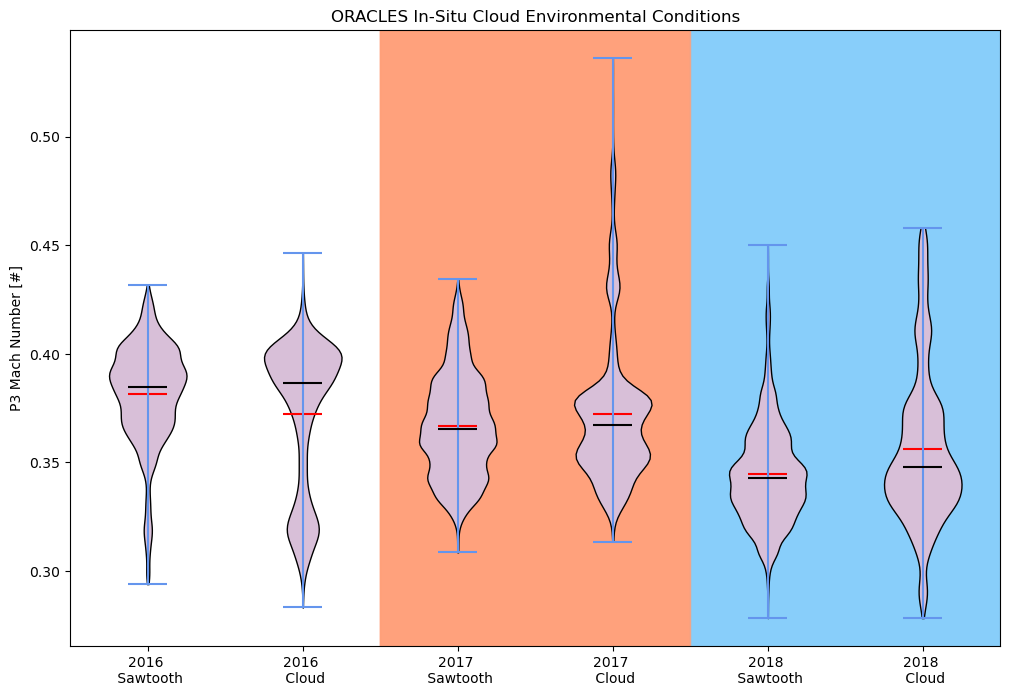

In [2]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def oracles_read(nfiles, nvar='Mach_Number'):

    def select_vars(obj, nvar=nvar):
        dedup = obj
        # create a list of all variables in the dataset
        newlist = [x for x in dedup.keys() if x != 'P3_module_flags']
        # drop everything but input variables
        droplist = [y for y in newlist if y != nvar]
        # remove all other variables
        dedup = dedup.drop_vars(droplist)
        # Clean up dimensions
        ndims = [x for x in dedup.dims if x != 'time']
        # remove all extra dimensions
        dedup = dedup.drop_dims(ndims)
        return dedup
    
    # Read in all the ORACLEs 2018 data with ACT
    ds = xr.open_mfdataset(nfiles,
                           coords='minimal',
                           preprocess=select_vars
                          )
    
    return ds
    

def violin_plot(obj,
                axarr,
                year='2018',
                nvar='Mach_Number',
                ):
    """
    Violin plot to subset Sawtooth and Level Cloud leg profiles
    for a given variable and campaign. 

    Inputs
    ------

    obj : xarray mf_dataset
        must contain nvar as a DataArray, along with P3 Modules
    axarr : matplotlib axe 
        matplotlib suplot axe to plot into
    year : string
        string containing year of project
    pos : list
        list containing intergers for location to plot violins
    nvar : string
        variable to display

    Returns
    ------
    figure of violin plots
    """

    if nvar == 'True_Air_Speed':
        ylabel = 'True Air Speed [knots]'
    elif nvar == 'Static_Air_Temp':
        ylabel = 'Static Air Temperature [degree Celcius]'
    elif nvar == 'Static_Pressure':
        ylabel = 'Static Pressure [hPa]'
    else:
        ylabel = 'P3 Mach Number [#]'

    # Define the Sawtooth periods
    saw = np.where(obj['P3_module_flags'].data.compute() == 5)
    cl = np.where(obj['P3_module_flags'].data.compute() == 1)
    # Subset the Variable
    nvar_saw = [x for x in obj[nvar][saw].data[:].compute() if np.isnan(x) == False ]
    nvar_cl = [x for x in obj[nvar][cl].data[:].compute() if np.isnan(x) == False ]     
    # Define all the tick labels for the plots
    tick_label = ['',
                  '2016 \n Sawtooth', 
                  '2016 \n Cloud', 
                  '2017 \n Sawtooth', 
                  '2017 \n Cloud', 
                  '2018 \n Sawtooth', 
                  '2018 \n Cloud',
                  ]

    if year == '2016':
        npos = [1, 2]
    elif year == '2017':
        npos = [3, 4]
    elif year == '2018':
        npos = [5, 6]
    else:
        npos = [0, 7]
    print(npos)
    sc = axarr.violinplot(np.array(nvar_saw),
                       positions=[npos[0]],
                       vert=True,
                       showmeans=True,
                       showmedians=True,
                       showextrema=True
                      )

    sc2 = axarr.violinplot(np.array(nvar_cl),
                        positions=[npos[1]],
                        vert=True,
                        showmeans=True,
                        showmedians=True,
                        showextrema=True
                       )

    # Label the means/medians
    for partname in ('cbars','cmins','cmaxes'):
        sc[partname].set_edgecolor('cornflowerblue')
        sc2[partname].set_edgecolor('cornflowerblue')
    sc['cmeans'].set_edgecolor('red')
    sc['cmedians'].set_edgecolor('black')
    sc2['cmeans'].set_edgecolor('red')
    sc2['cmedians'].set_edgecolor('black')
    # Change the color of the body
    for pc in sc['bodies']:
       pc.set_facecolor('thistle')
       pc.set_edgecolor('black')
       pc.set_alpha(1)
    for vc in sc2['bodies']:
       vc.set_facecolor('thistle')
       vc.set_edgecolor('black')
       vc.set_alpha(1)

    # Set the title
    axarr.set_ylabel(ylabel)
    # Set the background color
    axarr.axvspan(4.5, 7, color='lightskyblue', zorder=-1, alpha=0.75)
    axarr.axvspan(2.5, 4.5, color='lightsalmon', zorder=-1, alpha=0.75)
    # set ticks
    axarr.set_xticks([0, 1, 2, 3, 4, 5, 6])
    axarr.set_xticklabels(tick_label)
    axarr.set_xlim([0.5, 6.5])
    axarr.set_title('ORACLES In-Situ Cloud Environmental Conditions')

    return axarr

def main():
    # locate all the ORACLES 2018 data
    file_list_2018 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2018*'))
    file_list_2017 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2017*'))
    file_list_2016 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2016*'))
    # read in all the ORACLES data
    ds2018 = oracles_read(file_list_2018)
    ds2017 = oracles_read(file_list_2017)
    ds2016 = oracles_read(file_list_2016)

    # create the plot
    # Plot the Mach Number violin plot for 2018
    fig, axarr = plt.subplots(1, 1, figsize=[12, 8])

    violin_plot(ds2016,
                axarr,
                year='2016')

    violin_plot(ds2017,
                axarr,
                year='2017')

    violin_plot(ds2018,
                axarr,
                year='2018')
    
    #plt.suptitle('ORACLES In-Situ Cloud Sampling')

if __name__ == '__main__':
    # call the main function
    main()

[1, 2]
[3, 4]
[5, 6]


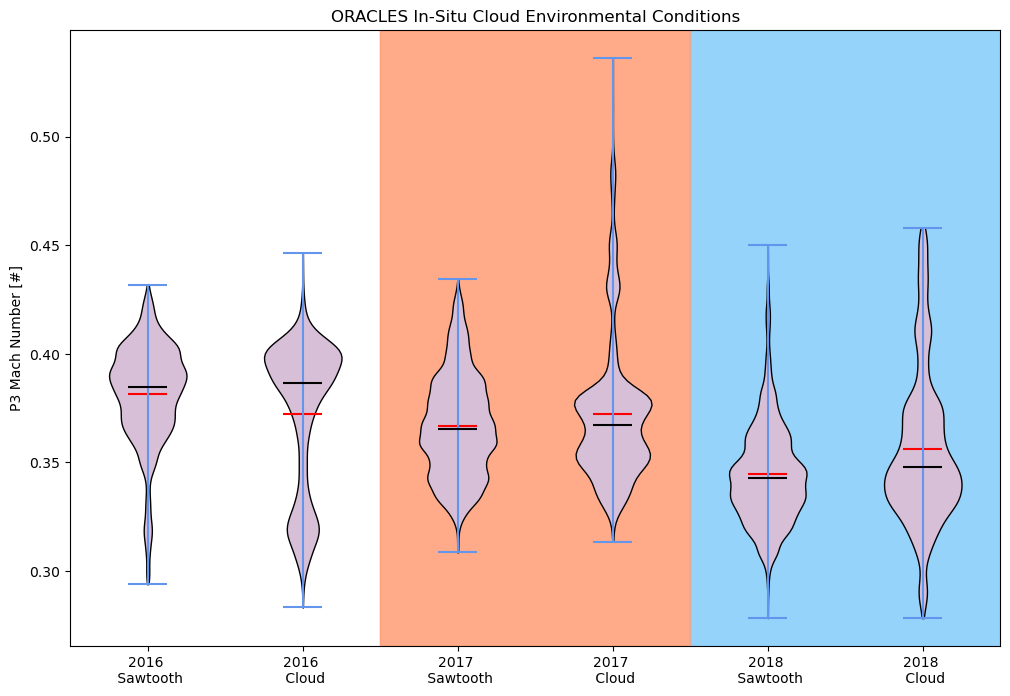

In [3]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def oracles_read(nfiles, nvar='Mach_Number'):

    def select_vars(obj, nvar=nvar):
        dedup = obj
        # create a list of all variables in the dataset
        newlist = [x for x in dedup.keys() if x != 'P3_module_flags']
        # drop everything but input variables
        droplist = [y for y in newlist if y != nvar]
        # remove all other variables
        dedup = dedup.drop_vars(droplist)
        # Clean up dimensions
        ndims = [x for x in dedup.dims if x != 'time']
        # remove all extra dimensions
        dedup = dedup.drop_dims(ndims)
        return dedup
    
    # Read in all the ORACLEs 2018 data with ACT
    ds = xr.open_mfdataset(nfiles,
                           coords='minimal',
                           preprocess=select_vars
                          )
    
    return ds
    

def violin_plot(obj,
                axarr,
                year='2018',
                nvar='Mach_Number',
                ):
    """
    Violin plot to subset Sawtooth and Level Cloud leg profiles
    for a given variable and campaign. 

    Inputs
    ------

    obj : xarray mf_dataset
        must contain nvar as a DataArray, along with P3 Modules
    axarr : matplotlib axe 
        matplotlib suplot axe to plot into
    year : string
        string containing year of project
    pos : list
        list containing intergers for location to plot violins
    nvar : string
        variable to display

    Returns
    ------
    figure of violin plots
    """

    if nvar == 'True_Air_Speed':
        ylabel = 'True Air Speed [knots]'
    elif nvar == 'Static_Air_Temp':
        ylabel = 'Static Air Temperature [degree Celcius]'
    elif nvar == 'Static_Pressure':
        ylabel = 'Static Pressure [hPa]'
    else:
        ylabel = 'P3 Mach Number [#]'

    # Define the Sawtooth periods
    saw = np.where(obj['P3_module_flags'].data.compute() == 5)
    cl = np.where(obj['P3_module_flags'].data.compute() == 1)
    # Subset the Variable
    nvar_saw = [x for x in obj[nvar][saw].data[:].compute() if np.isnan(x) == False ]
    nvar_cl = [x for x in obj[nvar][cl].data[:].compute() if np.isnan(x) == False ]     
    # Define all the tick labels for the plots
    tick_label = ['',
                  '2016 \n Sawtooth', 
                  '2016 \n Cloud', 
                  '2017 \n Sawtooth', 
                  '2017 \n Cloud', 
                  '2018 \n Sawtooth', 
                  '2018 \n Cloud',
                  ]

    if year == '2016':
        npos = [1, 2]
    elif year == '2017':
        npos = [3, 4]
    elif year == '2018':
        npos = [5, 6]
    else:
        npos = [0, 7]
    print(npos)
    sc = axarr.violinplot(np.array(nvar_saw),
                       positions=[npos[0]],
                       vert=True,
                       showmeans=True,
                       showmedians=True,
                       showextrema=True
                      )

    sc2 = axarr.violinplot(np.array(nvar_cl),
                        positions=[npos[1]],
                        vert=True,
                        showmeans=True,
                        showmedians=True,
                        showextrema=True
                       )

    # Label the means/medians
    for partname in ('cbars','cmins','cmaxes'):
        sc[partname].set_edgecolor('cornflowerblue')
        sc2[partname].set_edgecolor('cornflowerblue')
    sc['cmeans'].set_edgecolor('red')
    sc['cmedians'].set_edgecolor('black')
    sc2['cmeans'].set_edgecolor('red')
    sc2['cmedians'].set_edgecolor('black')
    # Change the color of the body
    for pc in sc['bodies']:
       pc.set_facecolor('thistle')
       pc.set_edgecolor('black')
       pc.set_alpha(1)
    for vc in sc2['bodies']:
       vc.set_facecolor('thistle')
       vc.set_edgecolor('black')
       vc.set_alpha(1)

    # Set the title
    axarr.set_ylabel(ylabel)
    # Set the background color
    axarr.axvspan(4.5, 7, color='lightskyblue', zorder=-1, alpha=0.5)
    axarr.axvspan(2.5, 4.5, color='lightsalmon', zorder=-1, alpha=0.5)
    # set ticks
    axarr.set_xticks([0, 1, 2, 3, 4, 5, 6])
    axarr.set_xticklabels(tick_label)
    axarr.set_xlim([0.5, 6.5])
    axarr.set_title('ORACLES In-Situ Cloud Environmental Conditions')

    return axarr

def main():
    # locate all the ORACLES 2018 data
    file_list_2018 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2018*'))
    file_list_2017 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2017*'))
    file_list_2016 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2016*'))
    # read in all the ORACLES data
    ds2018 = oracles_read(file_list_2018)
    ds2017 = oracles_read(file_list_2017)
    ds2016 = oracles_read(file_list_2016)

    # create the plot
    # Plot the Mach Number violin plot for 2018
    fig, axarr = plt.subplots(1, 1, figsize=[12, 8])

    violin_plot(ds2016,
                axarr,
                year='2016')

    violin_plot(ds2017,
                axarr,
                year='2017')

    violin_plot(ds2018,
                axarr,
                year='2018')
    
    #plt.suptitle('ORACLES In-Situ Cloud Sampling')

if __name__ == '__main__':
    # call the main function
    main()

[1, 2]
[3, 4]
[5, 6]


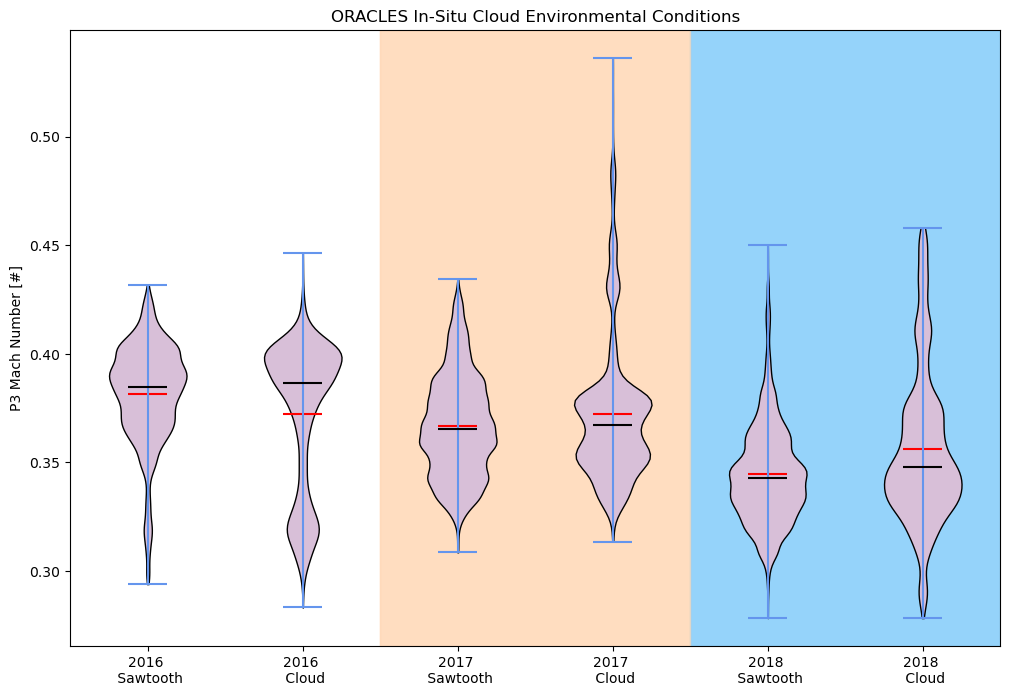

In [4]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def oracles_read(nfiles, nvar='Mach_Number'):

    def select_vars(obj, nvar=nvar):
        dedup = obj
        # create a list of all variables in the dataset
        newlist = [x for x in dedup.keys() if x != 'P3_module_flags']
        # drop everything but input variables
        droplist = [y for y in newlist if y != nvar]
        # remove all other variables
        dedup = dedup.drop_vars(droplist)
        # Clean up dimensions
        ndims = [x for x in dedup.dims if x != 'time']
        # remove all extra dimensions
        dedup = dedup.drop_dims(ndims)
        return dedup
    
    # Read in all the ORACLEs 2018 data with ACT
    ds = xr.open_mfdataset(nfiles,
                           coords='minimal',
                           preprocess=select_vars
                          )
    
    return ds
    

def violin_plot(obj,
                axarr,
                year='2018',
                nvar='Mach_Number',
                ):
    """
    Violin plot to subset Sawtooth and Level Cloud leg profiles
    for a given variable and campaign. 

    Inputs
    ------

    obj : xarray mf_dataset
        must contain nvar as a DataArray, along with P3 Modules
    axarr : matplotlib axe 
        matplotlib suplot axe to plot into
    year : string
        string containing year of project
    pos : list
        list containing intergers for location to plot violins
    nvar : string
        variable to display

    Returns
    ------
    figure of violin plots
    """

    if nvar == 'True_Air_Speed':
        ylabel = 'True Air Speed [knots]'
    elif nvar == 'Static_Air_Temp':
        ylabel = 'Static Air Temperature [degree Celcius]'
    elif nvar == 'Static_Pressure':
        ylabel = 'Static Pressure [hPa]'
    else:
        ylabel = 'P3 Mach Number [#]'

    # Define the Sawtooth periods
    saw = np.where(obj['P3_module_flags'].data.compute() == 5)
    cl = np.where(obj['P3_module_flags'].data.compute() == 1)
    # Subset the Variable
    nvar_saw = [x for x in obj[nvar][saw].data[:].compute() if np.isnan(x) == False ]
    nvar_cl = [x for x in obj[nvar][cl].data[:].compute() if np.isnan(x) == False ]     
    # Define all the tick labels for the plots
    tick_label = ['',
                  '2016 \n Sawtooth', 
                  '2016 \n Cloud', 
                  '2017 \n Sawtooth', 
                  '2017 \n Cloud', 
                  '2018 \n Sawtooth', 
                  '2018 \n Cloud',
                  ]

    if year == '2016':
        npos = [1, 2]
    elif year == '2017':
        npos = [3, 4]
    elif year == '2018':
        npos = [5, 6]
    else:
        npos = [0, 7]
    print(npos)
    sc = axarr.violinplot(np.array(nvar_saw),
                       positions=[npos[0]],
                       vert=True,
                       showmeans=True,
                       showmedians=True,
                       showextrema=True
                      )

    sc2 = axarr.violinplot(np.array(nvar_cl),
                        positions=[npos[1]],
                        vert=True,
                        showmeans=True,
                        showmedians=True,
                        showextrema=True
                       )

    # Label the means/medians
    for partname in ('cbars','cmins','cmaxes'):
        sc[partname].set_edgecolor('cornflowerblue')
        sc2[partname].set_edgecolor('cornflowerblue')
    sc['cmeans'].set_edgecolor('red')
    sc['cmedians'].set_edgecolor('black')
    sc2['cmeans'].set_edgecolor('red')
    sc2['cmedians'].set_edgecolor('black')
    # Change the color of the body
    for pc in sc['bodies']:
       pc.set_facecolor('thistle')
       pc.set_edgecolor('black')
       pc.set_alpha(1)
    for vc in sc2['bodies']:
       vc.set_facecolor('thistle')
       vc.set_edgecolor('black')
       vc.set_alpha(1)

    # Set the title
    axarr.set_ylabel(ylabel)
    # Set the background color
    axarr.axvspan(4.5, 7, color='lightskyblue', zorder=-1, alpha=0.5)
    axarr.axvspan(2.5, 4.5, color='peachpuff', zorder=-1, alpha=0.5)
    # set ticks
    axarr.set_xticks([0, 1, 2, 3, 4, 5, 6])
    axarr.set_xticklabels(tick_label)
    axarr.set_xlim([0.5, 6.5])
    axarr.set_title('ORACLES In-Situ Cloud Environmental Conditions')

    return axarr

def main():
    # locate all the ORACLES 2018 data
    file_list_2018 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2018*'))
    file_list_2017 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2017*'))
    file_list_2016 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2016*'))
    # read in all the ORACLES data
    ds2018 = oracles_read(file_list_2018)
    ds2017 = oracles_read(file_list_2017)
    ds2016 = oracles_read(file_list_2016)

    # create the plot
    # Plot the Mach Number violin plot for 2018
    fig, axarr = plt.subplots(1, 1, figsize=[12, 8])

    violin_plot(ds2016,
                axarr,
                year='2016')

    violin_plot(ds2017,
                axarr,
                year='2017')

    violin_plot(ds2018,
                axarr,
                year='2018')
    
    #plt.suptitle('ORACLES In-Situ Cloud Sampling')

if __name__ == '__main__':
    # call the main function
    main()

[1, 2]
[3, 4]
[5, 6]


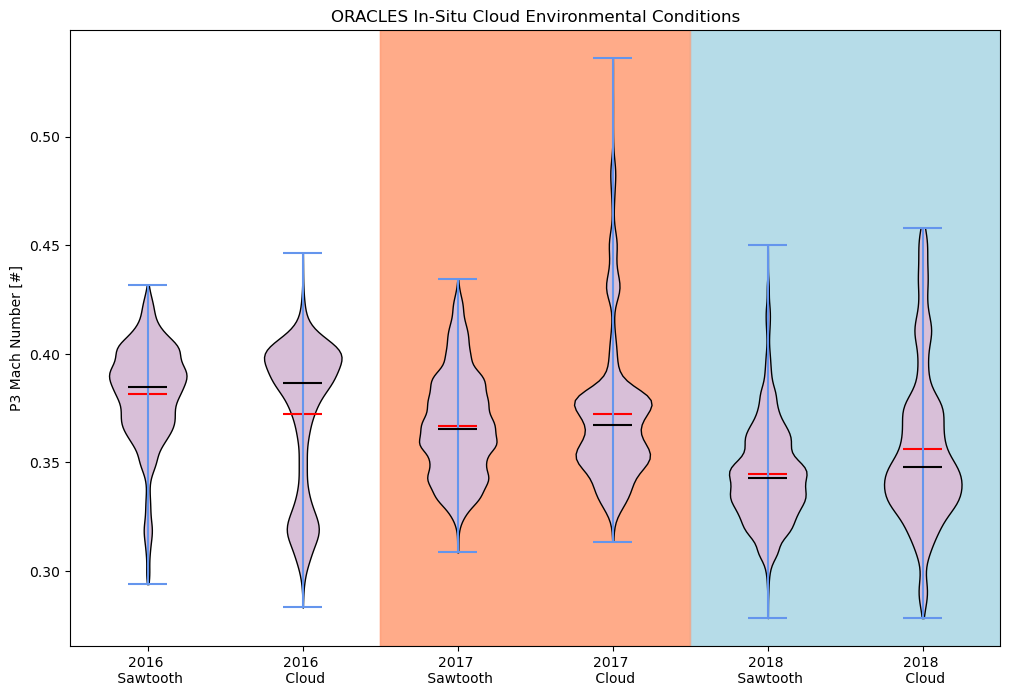

In [5]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def oracles_read(nfiles, nvar='Mach_Number'):

    def select_vars(obj, nvar=nvar):
        dedup = obj
        # create a list of all variables in the dataset
        newlist = [x for x in dedup.keys() if x != 'P3_module_flags']
        # drop everything but input variables
        droplist = [y for y in newlist if y != nvar]
        # remove all other variables
        dedup = dedup.drop_vars(droplist)
        # Clean up dimensions
        ndims = [x for x in dedup.dims if x != 'time']
        # remove all extra dimensions
        dedup = dedup.drop_dims(ndims)
        return dedup
    
    # Read in all the ORACLEs 2018 data with ACT
    ds = xr.open_mfdataset(nfiles,
                           coords='minimal',
                           preprocess=select_vars
                          )
    
    return ds
    

def violin_plot(obj,
                axarr,
                year='2018',
                nvar='Mach_Number',
                ):
    """
    Violin plot to subset Sawtooth and Level Cloud leg profiles
    for a given variable and campaign. 

    Inputs
    ------

    obj : xarray mf_dataset
        must contain nvar as a DataArray, along with P3 Modules
    axarr : matplotlib axe 
        matplotlib suplot axe to plot into
    year : string
        string containing year of project
    pos : list
        list containing intergers for location to plot violins
    nvar : string
        variable to display

    Returns
    ------
    figure of violin plots
    """

    if nvar == 'True_Air_Speed':
        ylabel = 'True Air Speed [knots]'
    elif nvar == 'Static_Air_Temp':
        ylabel = 'Static Air Temperature [degree Celcius]'
    elif nvar == 'Static_Pressure':
        ylabel = 'Static Pressure [hPa]'
    else:
        ylabel = 'P3 Mach Number [#]'

    # Define the Sawtooth periods
    saw = np.where(obj['P3_module_flags'].data.compute() == 5)
    cl = np.where(obj['P3_module_flags'].data.compute() == 1)
    # Subset the Variable
    nvar_saw = [x for x in obj[nvar][saw].data[:].compute() if np.isnan(x) == False ]
    nvar_cl = [x for x in obj[nvar][cl].data[:].compute() if np.isnan(x) == False ]     
    # Define all the tick labels for the plots
    tick_label = ['',
                  '2016 \n Sawtooth', 
                  '2016 \n Cloud', 
                  '2017 \n Sawtooth', 
                  '2017 \n Cloud', 
                  '2018 \n Sawtooth', 
                  '2018 \n Cloud',
                  ]

    if year == '2016':
        npos = [1, 2]
    elif year == '2017':
        npos = [3, 4]
    elif year == '2018':
        npos = [5, 6]
    else:
        npos = [0, 7]
    print(npos)
    sc = axarr.violinplot(np.array(nvar_saw),
                       positions=[npos[0]],
                       vert=True,
                       showmeans=True,
                       showmedians=True,
                       showextrema=True
                      )

    sc2 = axarr.violinplot(np.array(nvar_cl),
                        positions=[npos[1]],
                        vert=True,
                        showmeans=True,
                        showmedians=True,
                        showextrema=True
                       )

    # Label the means/medians
    for partname in ('cbars','cmins','cmaxes'):
        sc[partname].set_edgecolor('cornflowerblue')
        sc2[partname].set_edgecolor('cornflowerblue')
    sc['cmeans'].set_edgecolor('red')
    sc['cmedians'].set_edgecolor('black')
    sc2['cmeans'].set_edgecolor('red')
    sc2['cmedians'].set_edgecolor('black')
    # Change the color of the body
    for pc in sc['bodies']:
       pc.set_facecolor('thistle')
       pc.set_edgecolor('black')
       pc.set_alpha(1)
    for vc in sc2['bodies']:
       vc.set_facecolor('thistle')
       vc.set_edgecolor('black')
       vc.set_alpha(1)

    # Set the title
    axarr.set_ylabel(ylabel)
    # Set the background color
    axarr.axvspan(4.5, 7, color='lightblue', zorder=-1, alpha=0.5)
    axarr.axvspan(2.5, 4.5, color='lightsalmon', zorder=-1, alpha=0.5)
    # set ticks
    axarr.set_xticks([0, 1, 2, 3, 4, 5, 6])
    axarr.set_xticklabels(tick_label)
    axarr.set_xlim([0.5, 6.5])
    axarr.set_title('ORACLES In-Situ Cloud Environmental Conditions')

    return axarr

def main():
    # locate all the ORACLES 2018 data
    file_list_2018 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2018*'))
    file_list_2017 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2017*'))
    file_list_2016 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2016*'))
    # read in all the ORACLES data
    ds2018 = oracles_read(file_list_2018)
    ds2017 = oracles_read(file_list_2017)
    ds2016 = oracles_read(file_list_2016)

    # create the plot
    # Plot the Mach Number violin plot for 2018
    fig, axarr = plt.subplots(1, 1, figsize=[12, 8])

    violin_plot(ds2016,
                axarr,
                year='2016')

    violin_plot(ds2017,
                axarr,
                year='2017')

    violin_plot(ds2018,
                axarr,
                year='2018')
    
    #plt.suptitle('ORACLES In-Situ Cloud Sampling')

if __name__ == '__main__':
    # call the main function
    main()

[1, 2]
[3, 4]
[5, 6]


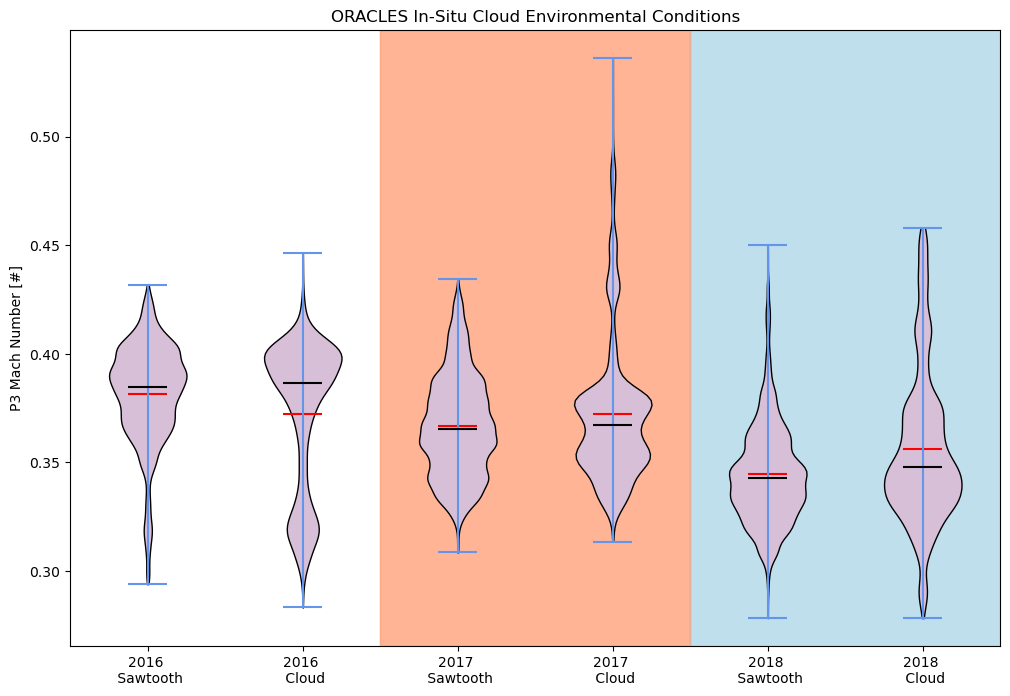

In [6]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def oracles_read(nfiles, nvar='Mach_Number'):

    def select_vars(obj, nvar=nvar):
        dedup = obj
        # create a list of all variables in the dataset
        newlist = [x for x in dedup.keys() if x != 'P3_module_flags']
        # drop everything but input variables
        droplist = [y for y in newlist if y != nvar]
        # remove all other variables
        dedup = dedup.drop_vars(droplist)
        # Clean up dimensions
        ndims = [x for x in dedup.dims if x != 'time']
        # remove all extra dimensions
        dedup = dedup.drop_dims(ndims)
        return dedup
    
    # Read in all the ORACLEs 2018 data with ACT
    ds = xr.open_mfdataset(nfiles,
                           coords='minimal',
                           preprocess=select_vars
                          )
    
    return ds
    

def violin_plot(obj,
                axarr,
                year='2018',
                nvar='Mach_Number',
                ):
    """
    Violin plot to subset Sawtooth and Level Cloud leg profiles
    for a given variable and campaign. 

    Inputs
    ------

    obj : xarray mf_dataset
        must contain nvar as a DataArray, along with P3 Modules
    axarr : matplotlib axe 
        matplotlib suplot axe to plot into
    year : string
        string containing year of project
    pos : list
        list containing intergers for location to plot violins
    nvar : string
        variable to display

    Returns
    ------
    figure of violin plots
    """

    if nvar == 'True_Air_Speed':
        ylabel = 'True Air Speed [knots]'
    elif nvar == 'Static_Air_Temp':
        ylabel = 'Static Air Temperature [degree Celcius]'
    elif nvar == 'Static_Pressure':
        ylabel = 'Static Pressure [hPa]'
    else:
        ylabel = 'P3 Mach Number [#]'

    # Define the Sawtooth periods
    saw = np.where(obj['P3_module_flags'].data.compute() == 5)
    cl = np.where(obj['P3_module_flags'].data.compute() == 1)
    # Subset the Variable
    nvar_saw = [x for x in obj[nvar][saw].data[:].compute() if np.isnan(x) == False ]
    nvar_cl = [x for x in obj[nvar][cl].data[:].compute() if np.isnan(x) == False ]     
    # Define all the tick labels for the plots
    tick_label = ['',
                  '2016 \n Sawtooth', 
                  '2016 \n Cloud', 
                  '2017 \n Sawtooth', 
                  '2017 \n Cloud', 
                  '2018 \n Sawtooth', 
                  '2018 \n Cloud',
                  ]

    if year == '2016':
        npos = [1, 2]
    elif year == '2017':
        npos = [3, 4]
    elif year == '2018':
        npos = [5, 6]
    else:
        npos = [0, 7]
    print(npos)
    sc = axarr.violinplot(np.array(nvar_saw),
                       positions=[npos[0]],
                       vert=True,
                       showmeans=True,
                       showmedians=True,
                       showextrema=True
                      )

    sc2 = axarr.violinplot(np.array(nvar_cl),
                        positions=[npos[1]],
                        vert=True,
                        showmeans=True,
                        showmedians=True,
                        showextrema=True
                       )

    # Label the means/medians
    for partname in ('cbars','cmins','cmaxes'):
        sc[partname].set_edgecolor('cornflowerblue')
        sc2[partname].set_edgecolor('cornflowerblue')
    sc['cmeans'].set_edgecolor('red')
    sc['cmedians'].set_edgecolor('black')
    sc2['cmeans'].set_edgecolor('red')
    sc2['cmedians'].set_edgecolor('black')
    # Change the color of the body
    for pc in sc['bodies']:
       pc.set_facecolor('thistle')
       pc.set_edgecolor('black')
       pc.set_alpha(1)
    for vc in sc2['bodies']:
       vc.set_facecolor('thistle')
       vc.set_edgecolor('black')
       vc.set_alpha(1)

    # Set the title
    axarr.set_ylabel(ylabel)
    # Set the background color
    axarr.axvspan(4.5, 7, color='lightblue', zorder=-1, alpha=0.4)
    axarr.axvspan(2.5, 4.5, color='lightsalmon', zorder=-1, alpha=0.4)
    # set ticks
    axarr.set_xticks([0, 1, 2, 3, 4, 5, 6])
    axarr.set_xticklabels(tick_label)
    axarr.set_xlim([0.5, 6.5])
    axarr.set_title('ORACLES In-Situ Cloud Environmental Conditions')

    return axarr

def main():
    # locate all the ORACLES 2018 data
    file_list_2018 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2018*'))
    file_list_2017 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2017*'))
    file_list_2016 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2016*'))
    # read in all the ORACLES data
    ds2018 = oracles_read(file_list_2018)
    ds2017 = oracles_read(file_list_2017)
    ds2016 = oracles_read(file_list_2016)

    # create the plot
    # Plot the Mach Number violin plot for 2018
    fig, axarr = plt.subplots(1, 1, figsize=[12, 8])

    violin_plot(ds2016,
                axarr,
                year='2016')

    violin_plot(ds2017,
                axarr,
                year='2017')

    violin_plot(ds2018,
                axarr,
                year='2018')
    
    #plt.suptitle('ORACLES In-Situ Cloud Sampling')

if __name__ == '__main__':
    # call the main function
    main()

[1, 2]
[3, 4]
[5, 6]


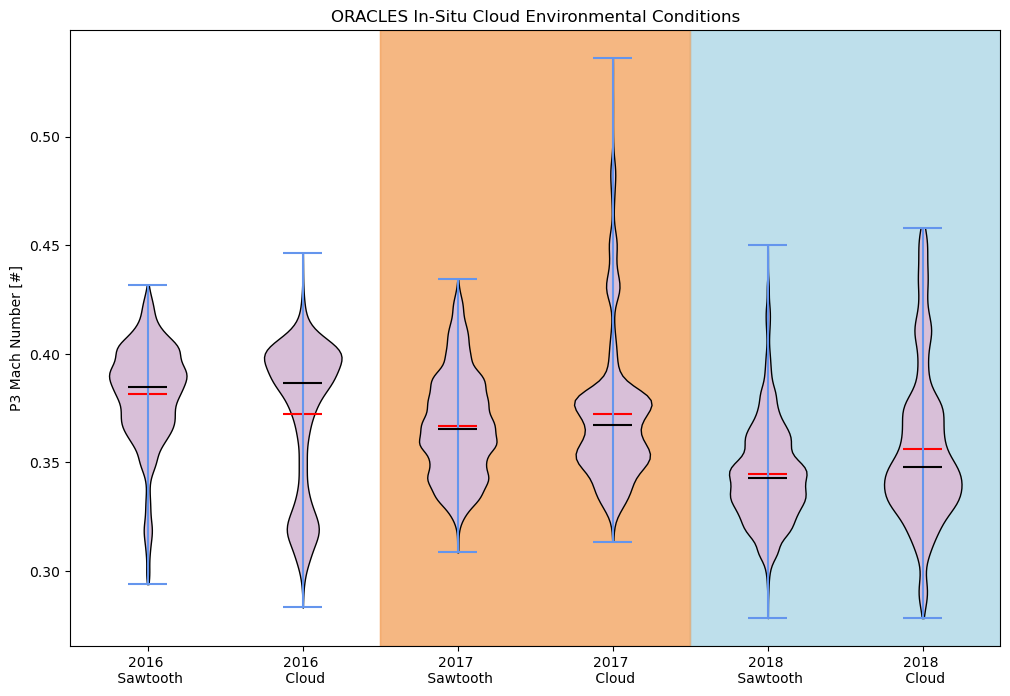

In [7]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def oracles_read(nfiles, nvar='Mach_Number'):

    def select_vars(obj, nvar=nvar):
        dedup = obj
        # create a list of all variables in the dataset
        newlist = [x for x in dedup.keys() if x != 'P3_module_flags']
        # drop everything but input variables
        droplist = [y for y in newlist if y != nvar]
        # remove all other variables
        dedup = dedup.drop_vars(droplist)
        # Clean up dimensions
        ndims = [x for x in dedup.dims if x != 'time']
        # remove all extra dimensions
        dedup = dedup.drop_dims(ndims)
        return dedup
    
    # Read in all the ORACLEs 2018 data with ACT
    ds = xr.open_mfdataset(nfiles,
                           coords='minimal',
                           preprocess=select_vars
                          )
    
    return ds
    

def violin_plot(obj,
                axarr,
                year='2018',
                nvar='Mach_Number',
                ):
    """
    Violin plot to subset Sawtooth and Level Cloud leg profiles
    for a given variable and campaign. 

    Inputs
    ------

    obj : xarray mf_dataset
        must contain nvar as a DataArray, along with P3 Modules
    axarr : matplotlib axe 
        matplotlib suplot axe to plot into
    year : string
        string containing year of project
    pos : list
        list containing intergers for location to plot violins
    nvar : string
        variable to display

    Returns
    ------
    figure of violin plots
    """

    if nvar == 'True_Air_Speed':
        ylabel = 'True Air Speed [knots]'
    elif nvar == 'Static_Air_Temp':
        ylabel = 'Static Air Temperature [degree Celcius]'
    elif nvar == 'Static_Pressure':
        ylabel = 'Static Pressure [hPa]'
    else:
        ylabel = 'P3 Mach Number [#]'

    # Define the Sawtooth periods
    saw = np.where(obj['P3_module_flags'].data.compute() == 5)
    cl = np.where(obj['P3_module_flags'].data.compute() == 1)
    # Subset the Variable
    nvar_saw = [x for x in obj[nvar][saw].data[:].compute() if np.isnan(x) == False ]
    nvar_cl = [x for x in obj[nvar][cl].data[:].compute() if np.isnan(x) == False ]     
    # Define all the tick labels for the plots
    tick_label = ['',
                  '2016 \n Sawtooth', 
                  '2016 \n Cloud', 
                  '2017 \n Sawtooth', 
                  '2017 \n Cloud', 
                  '2018 \n Sawtooth', 
                  '2018 \n Cloud',
                  ]

    if year == '2016':
        npos = [1, 2]
    elif year == '2017':
        npos = [3, 4]
    elif year == '2018':
        npos = [5, 6]
    else:
        npos = [0, 7]
    print(npos)
    sc = axarr.violinplot(np.array(nvar_saw),
                       positions=[npos[0]],
                       vert=True,
                       showmeans=True,
                       showmedians=True,
                       showextrema=True
                      )

    sc2 = axarr.violinplot(np.array(nvar_cl),
                        positions=[npos[1]],
                        vert=True,
                        showmeans=True,
                        showmedians=True,
                        showextrema=True
                       )

    # Label the means/medians
    for partname in ('cbars','cmins','cmaxes'):
        sc[partname].set_edgecolor('cornflowerblue')
        sc2[partname].set_edgecolor('cornflowerblue')
    sc['cmeans'].set_edgecolor('red')
    sc['cmedians'].set_edgecolor('black')
    sc2['cmeans'].set_edgecolor('red')
    sc2['cmedians'].set_edgecolor('black')
    # Change the color of the body
    for pc in sc['bodies']:
       pc.set_facecolor('thistle')
       pc.set_edgecolor('black')
       pc.set_alpha(1)
    for vc in sc2['bodies']:
       vc.set_facecolor('thistle')
       vc.set_edgecolor('black')
       vc.set_alpha(1)

    # Set the title
    axarr.set_ylabel(ylabel)
    # Set the background color
    axarr.axvspan(4.5, 7, color='lightblue', zorder=-1, alpha=0.4)
    axarr.axvspan(2.5, 4.5, color='sandybrown', zorder=-1, alpha=0.4)
    # set ticks
    axarr.set_xticks([0, 1, 2, 3, 4, 5, 6])
    axarr.set_xticklabels(tick_label)
    axarr.set_xlim([0.5, 6.5])
    axarr.set_title('ORACLES In-Situ Cloud Environmental Conditions')

    return axarr

def main():
    # locate all the ORACLES 2018 data
    file_list_2018 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2018*'))
    file_list_2017 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2017*'))
    file_list_2016 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2016*'))
    # read in all the ORACLES data
    ds2018 = oracles_read(file_list_2018)
    ds2017 = oracles_read(file_list_2017)
    ds2016 = oracles_read(file_list_2016)

    # create the plot
    # Plot the Mach Number violin plot for 2018
    fig, axarr = plt.subplots(1, 1, figsize=[12, 8])

    violin_plot(ds2016,
                axarr,
                year='2016')

    violin_plot(ds2017,
                axarr,
                year='2017')

    violin_plot(ds2018,
                axarr,
                year='2018')
    
    #plt.suptitle('ORACLES In-Situ Cloud Sampling')

if __name__ == '__main__':
    # call the main function
    main()

[1, 2]
[3, 4]
[5, 6]


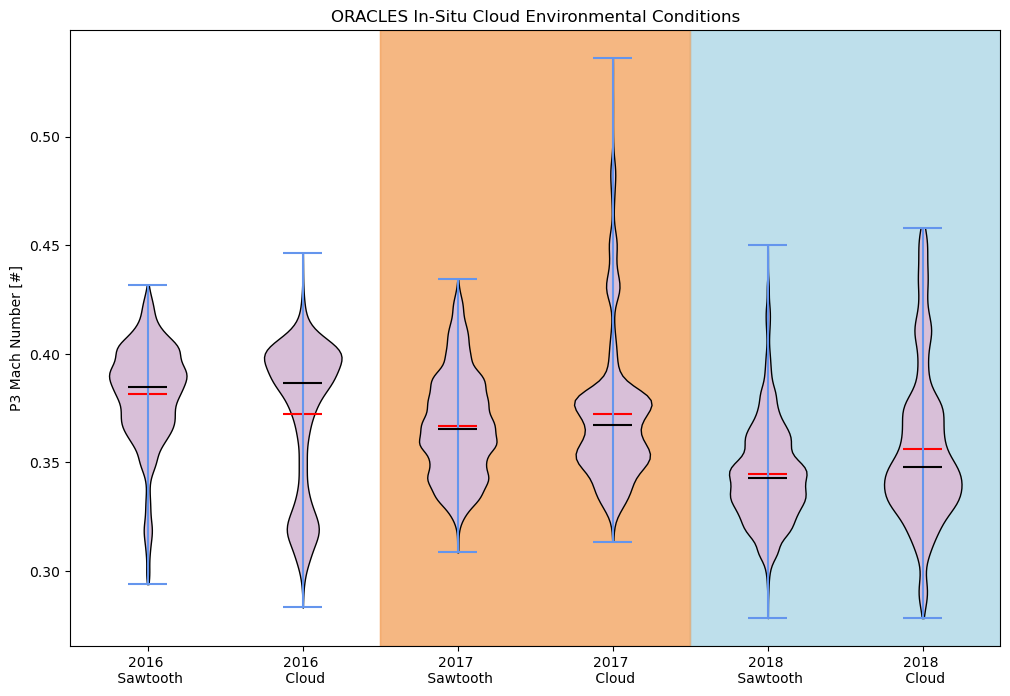

In [8]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def oracles_read(nfiles, nvar='Mach_Number'):

    def select_vars(obj, nvar=nvar):
        dedup = obj
        # create a list of all variables in the dataset
        newlist = [x for x in dedup.keys() if x != 'P3_module_flags']
        # drop everything but input variables
        droplist = [y for y in newlist if y != nvar]
        # remove all other variables
        dedup = dedup.drop_vars(droplist)
        # Clean up dimensions
        ndims = [x for x in dedup.dims if x != 'time']
        # remove all extra dimensions
        dedup = dedup.drop_dims(ndims)
        return dedup
    
    # Read in all the ORACLEs 2018 data with ACT
    ds = xr.open_mfdataset(nfiles,
                           coords='minimal',
                           preprocess=select_vars
                          )
    
    return ds
    

def violin_plot(obj,
                axarr,
                year='2018',
                nvar='Mach_Number',
                ):
    """
    Violin plot to subset Sawtooth and Level Cloud leg profiles
    for a given variable and campaign. 

    Inputs
    ------

    obj : xarray mf_dataset
        must contain nvar as a DataArray, along with P3 Modules
    axarr : matplotlib axe 
        matplotlib suplot axe to plot into
    year : string
        string containing year of project
    pos : list
        list containing intergers for location to plot violins
    nvar : string
        variable to display

    Returns
    ------
    figure of violin plots
    """

    if nvar == 'True_Air_Speed':
        ylabel = 'True Air Speed [knots]'
    elif nvar == 'Static_Air_Temp':
        ylabel = 'Static Air Temperature [degree Celcius]'
    elif nvar == 'Static_Pressure':
        ylabel = 'Static Pressure [hPa]'
    else:
        ylabel = 'P3 Mach Number [#]'

    # Define the Sawtooth periods
    saw = np.where(obj['P3_module_flags'].data.compute() == 5)
    cl = np.where(obj['P3_module_flags'].data.compute() == 1)
    # Subset the Variable
    nvar_saw = [x for x in obj[nvar][saw].data[:].compute() if np.isnan(x) == False ]
    nvar_cl = [x for x in obj[nvar][cl].data[:].compute() if np.isnan(x) == False ]     
    # Define all the tick labels for the plots
    tick_label = ['',
                  '2016 \n Sawtooth', 
                  '2016 \n Cloud', 
                  '2017 \n Sawtooth', 
                  '2017 \n Cloud', 
                  '2018 \n Sawtooth', 
                  '2018 \n Cloud',
                  ]

    if year == '2016':
        npos = [1, 2]
    elif year == '2017':
        npos = [3, 4]
    elif year == '2018':
        npos = [5, 6]
    else:
        npos = [0, 7]
    print(npos)
    sc = axarr.violinplot(np.array(nvar_saw),
                       positions=[npos[0]],
                       vert=True,
                       showmeans=True,
                       showmedians=True,
                       showextrema=True
                      )

    sc2 = axarr.violinplot(np.array(nvar_cl),
                        positions=[npos[1]],
                        vert=True,
                        showmeans=True,
                        showmedians=True,
                        showextrema=True
                       )

    # Label the means/medians
    for partname in ('cbars','cmins','cmaxes'):
        sc[partname].set_edgecolor('cornflowerblue')
        sc2[partname].set_edgecolor('cornflowerblue')
    sc['cmeans'].set_edgecolor('red')
    sc['cmedians'].set_edgecolor('black')
    sc2['cmeans'].set_edgecolor('red')
    sc2['cmedians'].set_edgecolor('black')
    # Change the color of the body
    for pc in sc['bodies']:
       pc.set_facecolor('thistle')
       pc.set_edgecolor('black')
       pc.set_alpha(1)
    for vc in sc2['bodies']:
       vc.set_facecolor('thistle')
       vc.set_edgecolor('black')
       vc.set_alpha(1)

    # Set the title
    axarr.set_ylabel(ylabel)
    # Set the background color
    axarr.axvspan(4.5, 7, color='lightblue', zorder=-1, alpha=0.4)
    axarr.axvspan(2.5, 4.5, color='sandybrown', zorder=-1, alpha=0.4)
    # set ticks
    axarr.set_xticks([0, 1, 2, 3, 4, 5, 6])
    axarr.set_xticklabels(tick_label)
    axarr.set_xlim([0.5, 6.5])
    axarr.set_title('ORACLES In-Situ Cloud Environmental Conditions')

    return axarr

def main():
    # locate all the ORACLES 2018 data
    file_list_2018 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2018*'))
    file_list_2017 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2017*'))
    file_list_2016 = sorted(glob.glob('/Users/jrobrien/Dissertation/data/oracles_merge/mrg1*2016*'))
    # read in all the ORACLES data
    ds2018 = oracles_read(file_list_2018)
    ds2017 = oracles_read(file_list_2017)
    ds2016 = oracles_read(file_list_2016)

    # create the plot
    # Plot the Mach Number violin plot for 2018
    fig, axarr = plt.subplots(1, 1, figsize=[12, 8])

    violin_plot(ds2016,
                axarr,
                year='2016')

    violin_plot(ds2017,
                axarr,
                year='2017')

    violin_plot(ds2018,
                axarr,
                year='2018')
    
    #plt.suptitle('ORACLES In-Situ Cloud Sampling')

if __name__ == '__main__':
    # call the main function
    main()